<a href="https://colab.research.google.com/github/sarathsreedharan/CSU_CS_445/blob/main/Spring25/Notebooks/module02_01_intro_to_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks

In [1]:
import numpy as np

If you remember from notebook 03 (intro to SGD): linear models can't solve the XOR problem.

**What is XOR?**

In [2]:
print("x\ty\tAND\tOR\tXOR\n-----------------------------------")
for x in [0,1]:
    for y in [0,1]:
        print("%s\t%s\t%s\t%s\t%s" % (x, y, x & y, x | y, x ^ y))

x	y	AND	OR	XOR
-----------------------------------
0	0	0	0	0
0	1	0	1	1
1	0	0	1	1
1	1	1	1	0


Below: black O where $X \veebar Y = 0$, blue X where $X \veebar Y = 1$


<img src="http://www.cs.colostate.edu/~cs445/notebooks/xor.png">


 Here is the solution to the XOR problem:

 ${\bf W} = \begin{bmatrix}
    1 & 1 \\
    1 & 1 \\
  \end{bmatrix}$
  
$c = \begin{bmatrix}
    0 \\
    -1 \\
  \end{bmatrix}$
  
$w = \begin{bmatrix}
    1 \\
    -2 \\
  \end{bmatrix}$
  
$b = 0$


In [3]:
W = np.array([[1,1],[1,1]])
c = np.array([0,-1])
w = np.array([1,-2])
b = 0

Let $X$ be the design matrix containing all four points in the binary input space:

$X = \begin{bmatrix}
    0 & 0 \\
    0 & 1 \\
    1 & 0 \\
    1 & 1 \\
\end{bmatrix}$

In [4]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

First, multiply the input matrix by the first layer's weight matrix:

$XW = \begin{bmatrix}
    0 & 0 \\
    1 & 1 \\
    1 & 1 \\
    2 & 2 \\
\end{bmatrix}$

In [5]:
X @ W

array([[0, 0],
       [1, 1],
       [1, 1],
       [2, 2]])

Next, add the bias vector $c$:

$z = \begin{bmatrix}
    0 & -1 \\
    1 & 0 \\
    1 & 0 \\
    2 & 1 \\
\end{bmatrix}$

In [6]:
(X @ W) + c

array([[ 0, -1],
       [ 1,  0],
       [ 1,  0],
       [ 2,  1]])

Now, the nonlinear step: The output needs to begin at 0, then rise to 1, then drop back down to 0. Apply non-linear transformation: if $z$ < 0, 0; else $z$ (a.k.a. max{0,$z$})

In [7]:
def f(z):
    return np.where(z < 0, 0, z)

$f(z) = \begin{bmatrix}
    0 & 0 \\
    1 & 0 \\
    1 & 0 \\
    2 & 1 \\
\end{bmatrix}$

In [8]:
z = (X @ W) + c
f(z)

array([[0, 0],
       [1, 0],
       [1, 0],
       [2, 1]])


<img src="http://www.cs.colostate.edu/~cs445/notebooks/xor-learnedspace.png">

The solution is now mapped to a learned space. Finally, multiply the weight vector ${\bf w}$:

$\begin{bmatrix}
    0 \\
    1 \\
    1 \\
    0 \\
\end{bmatrix}$

In [9]:
f(z) @ w

array([0, 1, 1, 0])

Now, all in one function:

In [10]:
def xor_nn(x):
    return (f((x @ W) + c) @ w)

In [11]:
X, xor_nn(X)

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([0, 1, 1, 0]))

Once more, more legibly.

In [12]:
def xor_nn(x):
    hidden_weights = (x @ W) + c
    activ = f(hidden_weights)
    output = activ @ w
    return output

In [13]:
X, xor_nn(X)

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([0, 1, 1, 0]))

This example involved no training.  We were supplied the right weights and bias.  Here's an example of solving XOR by training over lots of data: https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7

## All neural networks have this same basic form

$y = f({\bf W}X + b)$

Where $X$ is your input vectors, ${\bf W}$ is your weights, $b$ is the bias vector, and $f$ is some non-linear function.

## Activation Functions

Last time we saw how transforming the inputs using fixed nonlinear functions does result in models that are nonlinear in the inputs (e.g., $x^{13}$).  However, there is no general way to know which nonlinear functions to use.

A more general approach is to pick the form of a nonlinear function that is controlled by parameters, or weights,  whose values control the actual shape of the function. There are many possibilities for constructing such functions. Let's add some desireable properties:

   1. Computationally simple.
   2. For initial, small, weight values the function is close to linear.  As the weight magnitudes grow, the function becomes increasingly nonlinear.
   3. The derivative of the function is computationally simple.
   4. The magnitude of the derivative decreases as the weight magnitudes grows, perhaps asymptotically.
   5. The maximum value of the magnitude of the derivative is limited.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Let's start with a linear weighted sum, $s = {\bf w}^T {\bf x}$.  So, for a particular input sample ${\bf x}$, $s$ is small if the magnitudes of the weights of ${\bf w}$ are near zero.  As the weight magnitudes increase, the magnitude of $s$ increases.  

In [15]:
w = np.array([[0.1],[0.02],[0.003],[0.0004]]) # change these values and see what happens to s
x = np.array([[1],[2],[3],[4]])
s = w.T @ x
s

array([[0.1506]])

So let's try to construct a function of $s$ in the shape of the *derivative* that we want.

Using $-s$ as an exponent can make functions asymptotically decrease to zero, which we want (see #4 above).  Let's use base $e$, in case we deal with natural logarithms in the future.

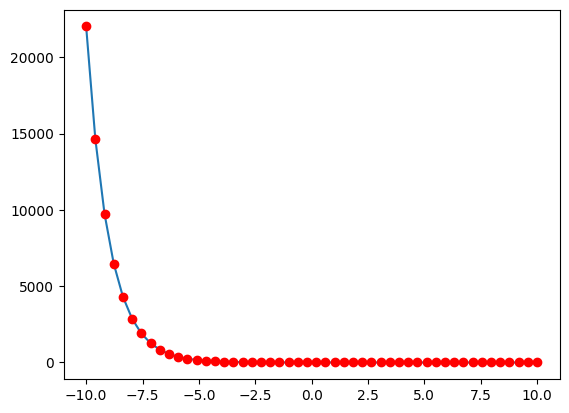

In [16]:
s = np.linspace(-10, 10, 50)
plt.plot(s, np.exp(-s))
plt.plot(s, np.exp(-s), 'ro')

Remember, we are constructing a derivative, and we want to limit the maximum value of the derivative (#5).

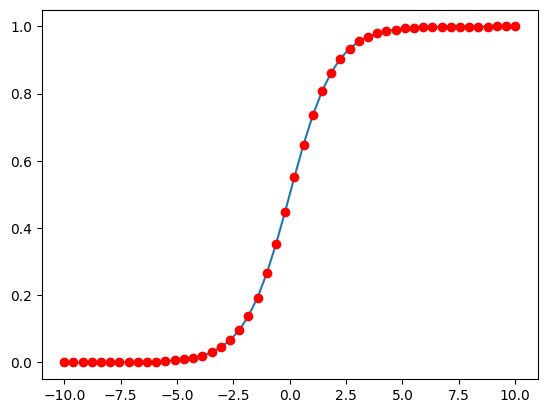

In [17]:
plt.plot(s, 1/(1+np.exp(-s)))
plt.plot(s, 1/(1+np.exp(-s)), 'ro');

Looking good.  Does what we want as $s$ grows more negative, but we also want to bring this function down to zero as $s$ becomes more positive (#4).

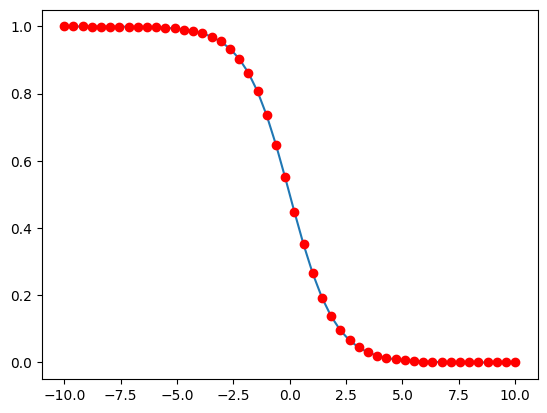

In [18]:
plt.plot(s, 1 - 1/(1+np.exp(-s)));
plt.plot(s, 1 - 1/(1+np.exp(-s)), 'ro');

Okay.  Now how can we combine these.  How about just multiply them?

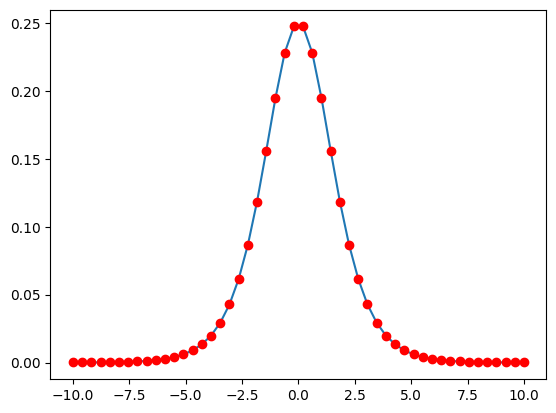

In [19]:
y = 1  / (1 + np.exp(-s))
plt.plot(s, y * (1 - y));
plt.plot(s, y * (1 - y), 'ro');

Hey!  Looks great.  It asymptotes to zero as the magnitude of $s$ grows and the maximum value is limited at 0.25.

How simple is it?  Well, there are common terms.

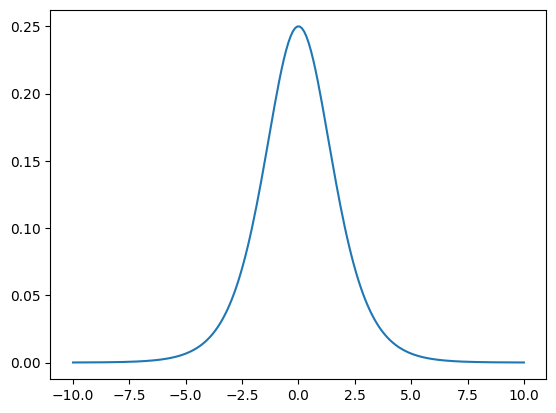

In [20]:
s = np.linspace(-10, 10, 200) # create more points for a smoother line
y = 1  / (1 + np.exp(-s)) # need to recompute because y is computed in terms of s and we resampled s
plt.plot(s, y * (1 - y));

In [21]:
import sympy
sympy.init_printing?
sympy.init_printing(use_unicode=True)

In [22]:
sS = sympy.Symbol('s')
sS

s

In [23]:
sympy.diff?

In [24]:
sympy.diff(sS**4, sS)

   3
4⋅s 

In [25]:
sympy.integrate?

In [26]:
y = 1  / (1 + sympy.exp(-sS))
sympy.integrate(y * (1 - y), sS)

   1   
───────
     -s
1 + ℯ  

Hey!  So, if $f(s)=\frac{1}{1+e^{-s}}$, the derivative of $f(s)$ is $f(s) (1-f(s))$.

Ta-da!  We just arrived at the common sigmoid function used in neural networks. Remembering what $s={\bf x}^T {\bf w}$ is, we get

$$
f({\bf x};{\bf w}) = \frac{1}{1 + e^{-{\bf x}^T {\bf w}}}
$$

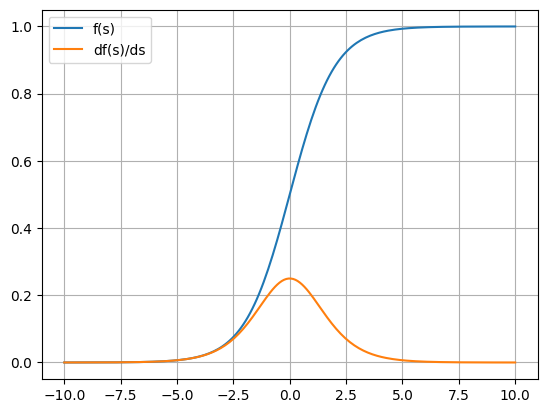

In [27]:
# define f(s)
def f(s):
    return 1 / (1 + np.exp(-s))

# define the f'(s) (d/ds f)
def df(f_value):
    return f_value * (1 - f_value)

# plot f(s) vs s (blue)
# plot d/ds f vs s (orange)
plt.plot(s, f(s))
plt.plot(s, df(f(s)))
plt.legend(('f(s)', 'df(s)/ds'))
plt.grid(True);

Let's try using stochastic gradient descent (SGD) to fit this "sigmoid" function to some data.  Find weight values that minimize the sum of squared errors in the output of this function.

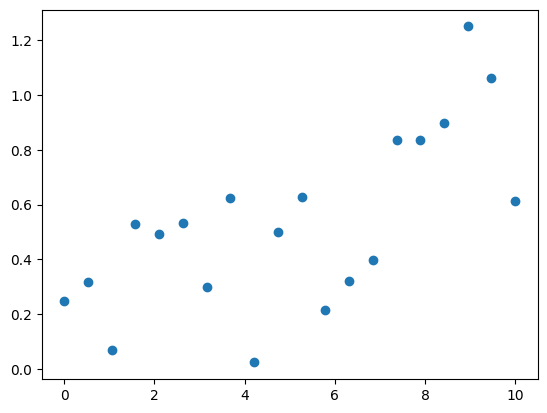

In [28]:
X = np.linspace(0, 10, 20).reshape((-1,1)) # sneaky python trick
T = X * 0.1 + np.random.uniform(-0.4, 0.4, size=(20, 1)) # include noise sampled from a uniform distribution
plt.plot(X, T, 'o');

What does this data represent?  What are the values in X?  What are the values in T?

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

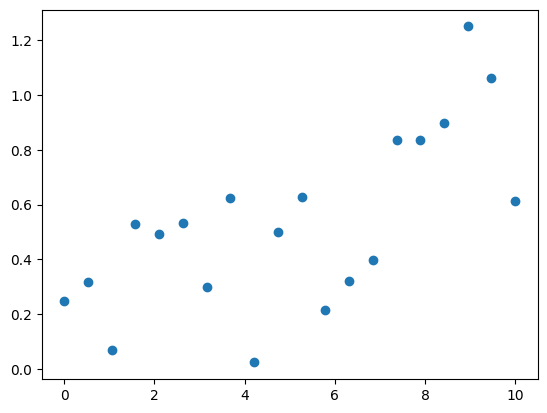

In [30]:
def train(X, T, learning_rate, epochs):
    w = np.zeros((2, 1)) # init weights
    rho = learning_rate
    X1 = np.insert(X, 0, 1, 1) # insert a constant column of 1s into our input
    for iter in range(epochs): # train for t epochs
        for n in range(X.shape[0]): # for each input
            Xn = X1[n:n + 1, :] # get the nth x (preserving the dimensional stucture by slicing across each ro)
            Tn = T[n:n + 1, :] # get the nth target
            yn = f(Xn @ w) # predict an output value by multiplying the input x by the weights w and applying a nonlinear function y
            # now update our weights
            # take the difference between the predicted value and the actual value (Tn - yn)
            # multiply this by the transpose of the input (Xn.T * {})
            # scale this by the learning rate and the derivative of f at yn (rho * {} * df(yn))
            w += rho * Xn.T * (Tn - yn) * df(yn)
    return w

weights = train(X,T,0.1,100)
plt.plot(X, T, 'o')
plt.plot(X, f(X @ weights))
weights

Let's create some other data.

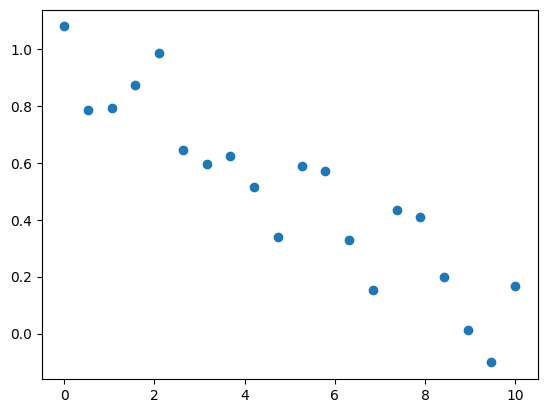

In [31]:
X = np.linspace(0, 10, 20).reshape((-1, 1))
T = 1 + -X * 0.1 + np.random.uniform(-0.2, 0.2, size=(20, 1))
plt.plot(X, T, 'o');

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

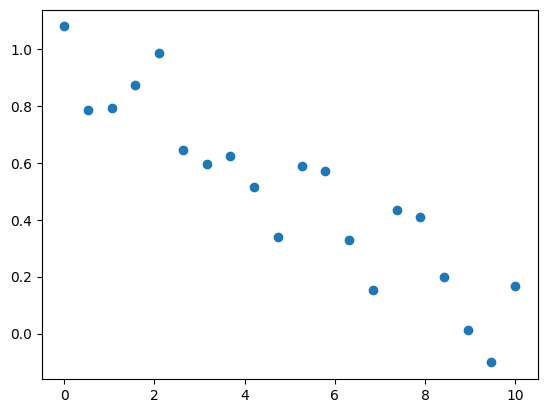

In [33]:
weights = train(X,T,0.1,100)
plt.plot(X, T, 'o')
plt.plot(X, f(X @ weights))
weights

How would you use this function to fit this data?

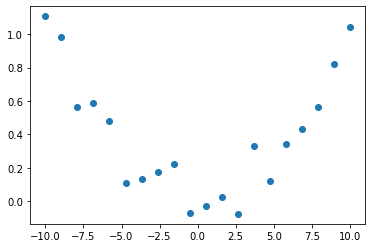

In [ ]:
X = np.linspace(-10, 10, 20).reshape((-1, 1))
T = X**2 * 0.01 + np.random.uniform(-0.2, 0.2, size=(20, 1))
plt.plot(X, T, 'o');

array([[-0.66344256],
       [ 0.21915987]])

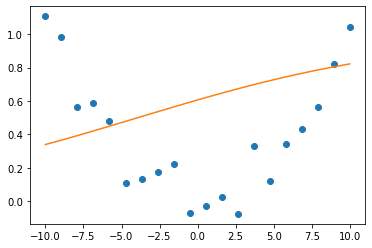

In [ ]:
weights = train(X,T,0.1,100)
plt.plot(X, T, 'o')
plt.plot(X, f(X1 @ weights));
weights

That didn't work very well.

There seems to be an inflection point around $x = 0$ ($-2.5 < x < 2.5$).  What kind of weights make a sigmoid function goes down from $(-inf, 0)$ and then goes up from $(0,inf)$?

They certainly aren't be easy to find.

We could use two of these functions and add their outputs together.

What if there were one set of weights ${\bf w}$ that caused $f({\bf x}^T {\bf w})$ to decrease until about 0 and then remain roughly flat, and another set of weights ${\bf v}$ such that $f({\bf x}^T {\bf v})$ is roughly flat until about 0 and then starts to increase?

Now we are talking multilayered neural networks!  One layer has two units that output $f({\bf x}^T {\bf w})$ each with their own ${\bf w}$.  The second layer has one linear unit with its own ${\bf w}$.

## Linear Models as Neural Networks

Given $X$ and $T$, find ${\bf w}_k$ that minimizes squared error in
the $k^{th}$ output, then use it to make predictions.
Collect all ${\bf w}_k$ as columns in ${\bf W}$.
$\tilde{\bf X}$ denotes ${\bf X}$ with  constant 1 column.  The target value
for the $k^{th}$ output for the $n^{th}$ sample is $t_{n,k}$.

$$
\begin{align*}
  E({\bf W}) &= \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - \tilde{\bf x}_n^T {\bf w}_k)^2\\
   {\bf W} &= (\tilde{\bf X}^T \tilde{\bf X})^{-1} \tilde{\bf X}^T {\bf T}\\
   \end{align*}$$
   
   (Compare this to solving for the value of ${\bf w}$ in notebook 03.)
   
 $$
 \begin{align*}
~\\
  {\bf W} &= \begin{bmatrix}
    w_{0,1} & w_{0,2} & \cdots & w_{0,K}\\
    w_{1,1} & w_{1,2} & \cdots & w_{1,K}\\
    \vdots\\
    w_{D,1} & w_{D,2} & \cdots & w_{D,K}
  \end{bmatrix}\\
 ~\\
  {\bf Y} &= \tilde{\bf X} {\bf W}\\
  ~\\
\tilde{\bf X} & \text{ is } N \times (D+1)\\
{\bf W} & \text{ is } (D+1) \times K\\
{\bf Y} & \text{ is } N \times K
\end{align*}
$$

The calculation of $y_{n,k} = \tilde{{\bf x}_n} {\bf w}_k$ can be drawn as


<img src="http://www.cs.colostate.edu/~cs445/notebooks/linear_model_as_nn.png">


## Adding Nonlinear Combinations of Inputs

Transform $X$ into $\Phi(X)$.  For example,

$$
\Phi(X) = \Phi\left (
\begin{bmatrix}
    x_{0,1} & x_{0,2} & \cdots \\
    x_{1,1} & x_{1,2} & \cdots \\
    \vdots\\
    x_{N-1,1} & x_{N-1,2} & \cdots
  \end{bmatrix}
\right ) =
\begin{bmatrix}
    x_{0,1} & x_{0,2}^5  & x_{0,2}^3 x_{0,4}^2 & \cdots \\
    x_{1,1} & x_{1,2}^5  & x_{1,2}^3 x_{1,4}^2 & \cdots\\
    \vdots\\
    x_{N-1,1} & x_{N-1,2}^5 & x_{N-1,2}^3 x_{N-1,4}^2 & \cdots
  \end{bmatrix}
$$

Now we just replace ${\bf X}$ by $\Phi$ (which we use to represent
$\Phi(X)$, and $\Phi_n = \Phi({\bf x}_n)$) and proceed.
We do our derivation to minimize

$$
  E_k = \sum_{n=1}^N (t_{n,k} - \tilde\Phi_n^T {\bf w}_k))^2
$$

from which we find that

$$
  {\bf W} = (\tilde{\Phi}^T \tilde{\Phi})^{-1} \tilde{\Phi}^T T
$$

and use it like

$$
\begin{align*}
  {\bf Y} = \tilde{\Phi} {\bf W}
\end{align*}
$$

<img src="http://www.cs.colostate.edu/~cs445/notebooks/whatnonlinearmap.png">

Now ${\bf X}$ is being passed through some nonlinear function $\Phi$ and the output of that is multiplied by ${\bf W}$ to get output ${\bf Y}$.

What should we put in the yellow box?  

Can we use the training data to figure this out?

## Structure of a Two Layer Neural Network

We have just entered the world of neural networks, with $\phi({\bf x})$ being the output of another layer of adaptive units, or $\phi({\bf x}) = h({\bf x})$.

<img src="http://www.cs.colostate.edu/~cs445/notebooks/two-layer-nn.png">

Dimensionalities at each step, where $N$ is the number of samples, $D$ is the number of dimensions to each sample (things you measure about $N$):

$\;\;\;\; \tilde{\bf X} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$\;\;\;\;\;\;\;\; {\bf V} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$ \;\;\; \tilde{\bf Z} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$\;\;\;\;\;\;\;\; {\bf W} \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$\; {\bf Y} \;\;\;\;\;\;\;\;\;\;\;\;$

$ N \times (D+1) \;\;\;\;\;\;\;\;\;\;\;\;~~$
$(D+1) \times M \;\;\;\;\;\;\;\;\;\;\;\;\;~~$
$ N \times (M+1) \;\;\;\;\;\;\;\;\;\;\;\;\;~~$
$(M+1)\times K \;\;\;\;\;\;\;\;\;\;\;\;\;~~$
$ N \times K$

$$
\begin{align*}
\tilde{\bf Z} & = h(\tilde{\bf X} {\bf V}),\\
{\bf Y} & = \tilde{\bf Z} {\bf W}, \text{ or }\\
{\bf Y} & = \tilde{h}(\tilde{\bf X} {\bf V}) {\bf W}
\end{align*}
$$

The two layers are called the **hidden** and **output** layer.

$h$ is the **activation function** for the units in the hidden layer.

We will be doing gradient descent in the squared error, so want
an $h$ whose derivative doesn't grow out of control as ${\bf v}$ grows, and whose
derivative is easy to calculate.

What about a polynomial function?

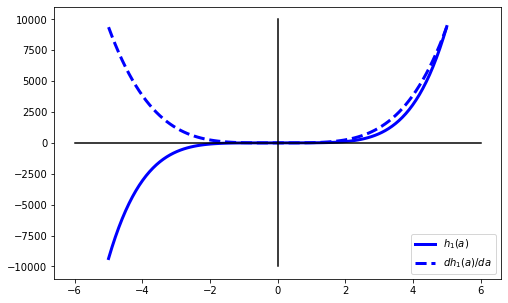

In [ ]:
# Let's plot a polynomial and its derivative to see if it satisfies the properties we want

def h(x):
    return 3 + 2 * x + 1 * x**2 + 3 * x**5

def dh(x):
    return 2 + 2 * x + 15 * x**4

plt.figure(figsize=(8,5))
xs = np.linspace(-5,5,100)
plt.plot(xs,h(xs),'b-',linewidth=3, label='$h_1(a)$')
plt.plot(xs,dh(xs),'b--',linewidth=3, label='$d h_1(a)/da$')

plt.plot((-6,6),(0,0),'k')
plt.plot((0,0),(-10000,10000),'k')
plt.plot([0,0],[-1,1],'r--',linewidth=3,alpha=0.5,)
plt.legend(loc='best');

Does this look like a well-behaved derivative (e.g., the sigmoid we were playing with earlier?)  Why or why not?

A gradient descent procedure takes steps of size proportional to the derivative.  This derivative gets huge---high positive as $a$ increases and high negative as $a$ decreases---so gradient descent if very unstable.  Such huge steps will shoot the gradient descent far away from a close local minimum.

Two common choices for functions with well-behaved derivatives are, where $a = \tilde{\bf x}^T {\bf v}$:
  * sigmoid (asymmetric)
  
$$
        \begin{align*}
          h_1(a) & = \frac{1}{1+e^{-a}}
        \end{align*}
$$

  * tanh (symmetric)
  
$$
        \begin{align*}
          h_2(a) & = \tanh(a) = \frac{e^{a} - e^{-a}}{e^{a} + e^{-a}}
        \end{align*}
$$

Work out their derivatives:

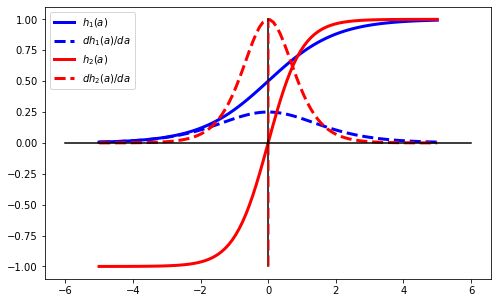

In [ ]:
def h1(a):
    return 1 / (1 + np.exp(-a))

def h2(a):
    return np.tanh(a)

def dh1(a):
    y = h1(a)
    return y * (1 - y)

def dh2(a):
    y = h2(a)
    return 1 - y*y

plt.figure(figsize=(8,5))
xs = np.linspace(-5, 5, 100)
plt.plot(xs, h1(xs), 'b-', linewidth=3, label='$h_1(a)$')
plt.plot(xs, dh1(xs), 'b--', linewidth=3, label='$d h_1(a)/da$')

plt.plot(xs, h2(xs), 'r-', linewidth=3, label='$h_2(a)$')
plt.plot(xs, dh2(xs), 'r--', linewidth=3, label='$d h_2(a)/da$')

plt.plot((-6, 6), (0, 0), 'k')
plt.plot((0, 0), (-1, 1), 'k')
plt.plot([0, 0], [-1, 1], 'r--', linewidth=3, alpha=0.5)
plt.legend(loc='best');

This looks better.  These derivatives:

   1. Are computationally simple, and so are their antidifferentiations.
   2. Decreases in magnitude as the weight magnitudes grows, perhaps asymptotically.
   3. Are limited in maximum values.

## Training by Gradient Descent

The mean squared error between each target value $t_{n,k}$ and
output (predicted) value $y_{n,k}$ is

$$
\begin{align*}
  E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K ( t_{n,k} - y_{n,k})^2
\end{align*}
$$

Since $E$ is no longer a linear function of the parameters (weights), we cannot set the derivative equal to zero and solve for the parameters.  Instead, we can do
gradient descent in $E$ by making small changes to weights $v_{j,m}$ and $w_{m,k}$ in the negative gradient direction.

$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} - \rho_h \frac{\partial E}{\partial v_{j,m}}\\
  w_{m,k} &\leftarrow w_{m,k} - \rho_o \frac{\partial E}{\partial w_{m,k}}
\end{align*}
$$

This is often presented as $\rho_h = \rho_o$, but having different
rates in the two layers often helps convergence rate.

Will this find the global optimum (the values of $v$ and $w$
that minimize the mean squared error)?

### First a Simplified View

Remember our picture of a full two-layer network?  Let's focus
on how to modify a single weight, $v_{1,1}$, based on a single error between $y_1$ and $t_1$.

<img src="http://www.cs.colostate.edu/~cs445/notebooks/two-layer-nn-with-targets.png">

Let's drop the subscripts for now.

<img src="http://www.cs.colostate.edu/~cs445/notebooks/two-layer-nn-with-targets-one-path.png">

Forward calculation (ignoring constant 1 input and all other terms)

$$
\begin{align*}
  y &= w\; h(v\;x) \text{ or }\\
  y &= w\; z\\
  z &= h(a)\\
  a &= v\; x
\end{align*}
$$

Since $E = (t - y)^2$

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = \frac{\partial (t - y)^2}{\partial v}
\end{align*}
$$

The [Chain Rule](https://en.wikipedia.org/wiki/Chain_rule) to the rescue.

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = \frac{\partial (t-y)^2}{\partial v}\\
  & = \frac{\partial (t-y)^2}{\partial y} \frac{\partial y}{\partial z} \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
  & = 2(t-y) \;\;(-1)\;\; w \;\;  \frac{\partial h(a)}{\partial a} \;\; x \\
\end{align*}
$$

If $h(a) = \tanh(a)$, then $\frac{\partial h(a)}{\partial a} = (1-h(a)^2) = (1-z^2)$. See [this page at Mathematics Stack Exchange](http://math.stackexchange.com/questions/741050/hyperbolic-functions-derivative-of-tanh-x).

$$
\begin{align*}
  \frac{\partial E}{\partial v} & = -2(t-y) \;\; w \;\;  \frac{\partial h(a)}{\partial a} \;\; x \\
  & = -2(t-y) \;\; w \;\;  (1-z^2) \;\; x
\end{align*}
$$

Let's add another output.

<img src="http://www.cs.colostate.edu/~cs445/notebooks/two-layer-nn-with-targets-one-path-two-outputs.png">

The Chain Rule again.

$$
       \begin{align*}
       \frac{\partial E}{\partial v} & = \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial v}\\
       & = \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial z} \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = \left ( \frac{\partial (t_1-y_1)^2 + (t_2-y_2)^2}{\partial y_1}\frac{\partial y_1}{\partial z} + \frac{\partial (y_1-t_1)^2 + (y_2-t_2)^2}{\partial y_2}\frac{\partial
           y_2}{\partial z} \right )  \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = \left ( -2(t_1-y_1) w_1 - 2(t_2 -y_2) w_2 \right ) \frac{\partial z}{\partial a} \frac{\partial a}{\partial v} \\
       & = -2 \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) \frac{\partial h(a)}{\partial a} x \\
       & = -2 \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x
       \end{align*}
$$

Think of the errors calculated in the output units as being sent backwards to the units in the previous layer.  If we label these errors as "delta" values, our derivative expressions form what are commonly referred to as "delta rules".  The delta values are "backpropagated" to the previous layer.  This process is called "error backpropagation", but is really just the chain rule of calculating derivatives!

First, remember these derivatives.

$$
       \begin{align*}
       \frac{\partial E}{\partial v} & = -2 ( (t_1-y_1) w_1 + (t_2-y_2) w_2  ) (1-z^2) x \\
       \frac{\partial E}{\partial w_1} & = -2 (t_1-y_1) z
       \end{align*}
$$

Now the update rules involving the deltas ($\delta$) are

$$
       \begin{align*}
       w &\leftarrow w - \frac{\partial E}{\partial w_1}\\
       &\leftarrow w + \rho_o  (t_1-y_1) z\\
       &\leftarrow w + \rho_o  \delta_1^{(o)}  z\\
       v & \leftarrow v - \frac{\partial E}{\partial v}\\
       & \leftarrow v + \rho_h \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \left ( (t_1-y_1) w_1 + (t_2-y_2) w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \left ( \delta_1^{(o)} w_1 + \delta_2^{(o)} w_2 \right ) (1-z^2) x \\
       & \leftarrow v + \rho_h \delta^{(h)} x\\
&\;\;\; \text{ where } \delta^{(h)} =  ( \delta_1^{(o)} w_1 + \delta_2^{(o)} w_2  ) (1-z^2)
       \end{align*}
$$

### Now for the Full Version of Back-Propagation

<img src="http://www.cs.colostate.edu/~cs445/notebooks/two-layer-nn-with-targets_full_backprop.png">

$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} - \rho_h \frac{\partial E}{\partial
    v_{j,m}}\\
 w_{m,k} & \leftarrow w_{m,k} - \rho_o \frac{\partial E}{\partial w_{m,k}}
\end{align*}
$$

A bit of calculus and algebra lead us to these expressions for doing gradient descent.

$$
\begin{align*}
  v_{j,m} &\leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) w_{m,k} (1-\tilde{z}_m^2) \tilde{x}_{n,j}\\
  w_{m,k} &\leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K} \sum_{n=1}^N
  (t_{n,k} - y_{n,k}) \tilde{z}_m
\end{align*}
$$

Now we will derive this result.
First work on $\frac{\partial E}{\partial w_{m,k}}$.

$$
\begin{align*}
  E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
  \frac{\partial E}{\partial w_{m,k}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'}) \frac{\partial y_{n,k'}}{\partial w_{m,k}}\\
  \text{Since } & y_{n,k'} = \sum_{m'=0}^M  w_{m',k'} \tilde{z}_{n,m'}\\
  \frac{\partial E}{\partial w_{m,k}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'})
  \frac{\partial \left ( \sum_{m'=0}^M w_{m',k'} \tilde{z}_{n,m'}  \right )}{\partial w_{m,k}}\\
  & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}
\end{align*}
$$

Now the hard one,  $\frac{\partial E}{\partial v_{j,m}}$.

$$
\begin{align*}
  E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
  \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'}) \frac{\partial y_{n,k'}}{\partial  v_{j,m}}
\end{align*}
$$

Knowing that

$$
\begin{align*}
  y_{n,k'} & = \sum_{m'=0}^M  w_{m',k'} \tilde{z}_{n,m'}\\
  &  = \sum_{m'=0}^M  w_{m',k'} \tilde{h}\left ( \sum_{j'=0}^D
    v_{j,m'} \tilde{x}_{n,j'} \right )
\end{align*}
$$

we can continue.

$$
\begin{align*}
  \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'})
  \frac{\partial \left ( \sum_{m'=0}^M  w_{m',k'} \tilde{h} \left ( \sum_{j'=0}^D v_{j',m'} \tilde{x}_{n,j'} \right ) \right )}{\partial v_{j,m}}\\
  \text{Let } a_{n,m'} & = \tilde{h} \left ( \sum_{j'=0}^D v_{j',m'} \tilde{x}_{n,j'}  \right )\\
  \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'})  \sum_{m'=0}^M  w_{m',k'}
  \frac{\partial \tilde{h}(a_{n,m'})}{\partial  a_{n,m'}} \frac{\partial a_{n,m'}}{\partial v_{j,m}}\\
  & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k'=1}^K (t_{n,k'} - y_{n,k'})  \sum_{m'=0}^M  w_{m',k'} \frac{\partial \tilde{h}(a_{n,m'})}{\partial a_{n,m'}} \tilde{x}_{n,j}
\end{align*}
$$

To summarize:

$$
    \begin{align*}
      E &= \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
      \frac{\partial E}{\partial w_{m,k}} & = -2 \frac{1}{N}  \frac{1}{K}
       \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}\\
      \frac{\partial E}{\partial v_{j,m}} & = -2 \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}
    \end{align*}
$$

Forward pass

$$
    \begin{align*}
      z_{n,m} &= h(\sum_{j=0}^D v_{j,m} \tilde{x}_{n,j})\\
      y_{n,k} &= \sum_{m=1}^M w_{m,k} \tilde{z}_{n,m}
    \end{align*}
$$

Backward pass

$$
\begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}\\
 w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K}  \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}
    \end{align*}
$$

## Preparing for Python

Convert these scalar expressions to matrix expressions.

Forward Pass

$$
    \begin{align*}
      z_{n,m} &= h(\sum_{j=0}^D v_{j,m} \tilde{x}_{n,j})\\
      z_{n,m} &= h( v_{*,m} \tilde{x}_{n,*})\\
      z_{n,m} &= h(  \tilde{x}_{n,*} v_{*,m})\\
      z_{*_n,m} &= h(  \tilde{x}_{*_n,*} v_{*,m})\\
      z_{*_n,*_m} &= h(  \tilde{x}_{*_n,*} v_{*,*_m})\\
      {\bf Z} &= h(\tilde{\bf X} {\bf V})\\
      y_{n,k} &= \sum_{m=1}^M w_{m,k} \tilde{z}_{n,m}\\
      y_{n,k} &=  \tilde{z}_{n,*} w_{*,k}\\
      y_{*_n,*_k} &=  \tilde{z}_{*_n,*} w_{*,*_k}\\
      {\bf Y} &= \tilde{\bf Z} {\bf W}
    \end{align*}
$$

Backward Pass for ${\bf V}$

$$
    \begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})   w_{m,k} (1-z_{n,m}^2) \tilde{x}_{n,j}\\
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \sum_{n=1}^N  (t_{n,*_k} - y_{n,*_k}) w_{m,*_k}^T   (1-z_{n,m}^2) \tilde{x}_{n,j}\\
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \mid_{N\times m} \right )^T
      \tilde{x}_{*_n,j}
\end{align*}
$$

Almost.  Result on right hand side has subscripts $m,j$, but left side is $j,m$. So

$$
    \begin{align*}
      v_{j,m} & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \left ( \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \right )^T
      \tilde{x}_{*_n,j} \right )^T\\
       & \leftarrow v_{j,m} + \rho_h \frac{1}{N} \frac{1}{K} \tilde{x}_{*_n,j}^T \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{m,*_k}^T \cdot  (1-z_{*_n,m}^2) \right )\\
       v_{*_j,*_m} & \leftarrow v_{*_j,*_m} + \rho_h \frac{1}{N} \frac{1}{K} \tilde{x}_{*_n,*_j}^T \left ( (t_{*_n,*_k} - y_{*_n,*_k}) w_{*_m,*_k}^T \cdot  (1-z_{*_n,*_m}^2)
       \right )\\
       {\bf V} & \leftarrow {\bf V} + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\bf X}^T \left ( ({\bf T} - {\bf Y}) \hat{\bf W}^T \cdot  (1-{\bf Z}^2) \right )\\
       {\bf V} & \leftarrow {\bf V} + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\bf X}^T \mid_{D\times N} \left ( ({\bf T} - {\bf Y}) \mid_{N\times K} \hat{\bf W}^T \mid_{N\times M} \cdot  (1-{\bf Z}^2)
         \mid_{N\times M}\right ) \mid_{D\times M}\\
       \text{where } & \hat{\bf W} \text{ is } {\bf W} \text{ without constant input row}
\end{align*}
$$


Backward Pass for ${\bf W}$

$$
    \begin{align*}
      w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K} \sum_{n=1}^N (t_{n,k} - y_{n,k}) \tilde{z}_{n,m}\\
      & \leftarrow w_{m,k} + \rho_o \frac{1}{N}  \frac{1}{K} (t_{*_n,k} - y_{*_n,k})^T \tilde{z}_{*_n,m}
    \end{align*}
$$

Again, almost.  Result on right hand side has subscripts $k,m$ but need $m,k$. So

$$
    \begin{align*}
      w_{m,k} & \leftarrow w_{m,k} + \rho_o \frac{1}{N} \frac{1}{K}   \left ( (t_{*_n,k} - y_{*_n,k})^T \tilde{z}_{*_n,m} \right )^T\\
       & \leftarrow w_{m,k} + \rho_o \frac{1}{N} \frac{1}{K} \tilde{z}_{*_n,m}^T (t_{*_n,k} - y_{*_n,k}) \\
      w_{*_m,*_k} & \leftarrow w_{*_m,*_k} + \rho_o \frac{1}{N} \frac{1}{K}  \tilde{z}_{*_n,*_m}^T (t_{*_n,*_k} - y_{*_n,*_k}) \\
      {\bf W} & \leftarrow {\bf W} + \rho_o \frac{1}{N} \frac{1}{K}  \tilde{\bf Z}^T ({\bf T} - {\bf Y})\\
      {\bf W} & \leftarrow {\bf W} + \rho_o \frac{1}{N} \frac{1}{K}  \tilde{\bf Z}^T \mid_{M\times N} ({\bf T} - {\bf Y} \mid_{N\times K}) \mid_{M\times K}
    \end{align*}
$$

All together now, first in math.

$$
    \begin{align*}
      {\bf Z} &= h(\tilde{\bf X} {\bf V})\\
      {\bf Y} &= \tilde{\bf Z} {\bf W}\\
       {\bf V} & \leftarrow {\bf V} + \rho_h \frac{1}{N} \frac{1}{K} \tilde{\bf X}^T \left ( ({\bf T} - {\bf Y}) \hat{\bf W}^T \cdot  (1-{\bf Z}^2) \right )\\
      {\bf W} & \leftarrow {\bf W} + \rho_o \frac{1}{N}  \frac{1}{K}\tilde{\bf Z}^T ({\bf T} - {\bf Y})
      \end{align*}
$$

Now in python.

    # Given input X and target T, do forward pass to calculate network output, Y
    X1 = addOnes(X)
    Z = tanh(X1 @ V))
    Z1 = addOnes(Z)
    Y = Z1 @ W
    # Do gradient descent on derivative of squared error with respect to each weight to update V and W.
    error = T - Y
    V = V + rh * X1.T @ ((error @ W[1:, :].T) * (1 - Z**2))
    W = W + ro * Z1.T @ error

## Finally, the Code

The above equations show a single step down the gradient of our mean square error, $E$. Here we are using all of our training data, in $X$ and $T$ to calculate the gradient of $E$ with respect to the weights.  Instead of writing  a for loop to step through each sample and update the weights on each step, which we called (Stochastic Gradient Descent), we are using the full gradient.

Here is an example. Let's fit a neural network to the function

$$
f(x) = 0.2 + 0.05 (x+10) + 0.4 \sin(x+10)) + 0.2 \epsilon
$$

where $\epsilon$ is a random variable drawn from the standard normal
distribution, or $\epsilon \sim \mathcal{N}(0,1)$, and $x \in [-10,10]$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd  # for display and clear_output
import time  # for sleep

In [ ]:
# Make some training data
n = 30
Xtrain = np.linspace(0., 20.0, n).reshape((n, 1)) - 10
Ttrain = 0.2 + 0.05 * (Xtrain + 10) + 0.4 * np.sin(Xtrain + 10) + 0.2 * np.random.normal(size=(n, 1))

# Make some testing data
Xtest = Xtrain + 0.1 * np.random.normal(size=(n, 1))
Ttest = 0.2 + 0.05 * (Xtest + 10) + 0.4 * np.sin(Xtest + 10) + 0.2 * np.random.normal(size=(n, 1))

nSamples = Xtrain.shape[0]
nOutputs = Ttrain.shape[1]

In [ ]:
# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=1)

In [ ]:
# standardize
Xmeans = Xtrain.mean(axis=0)
Xstds = Xtrain.std(axis=0)
Tmeans = Ttrain.mean(axis=0)
Tstds = Ttrain.std(axis=0)

XtrainS = (Xtrain - Xmeans) / Xstds
TtrainS = (Ttrain - Tmeans) / Tstds
XtestS = (Xtest - Xmeans) / Xstds
TtestS = (Ttest - Tmeans) / Tstds

In [ ]:
XtrainS1 = addOnes(XtrainS)
XtestS1 = addOnes(XtestS)

We must initialize the weights to random values. If all weights are initialized to zero, all hidden units will earn identical weights, as if we only have one hidden units.

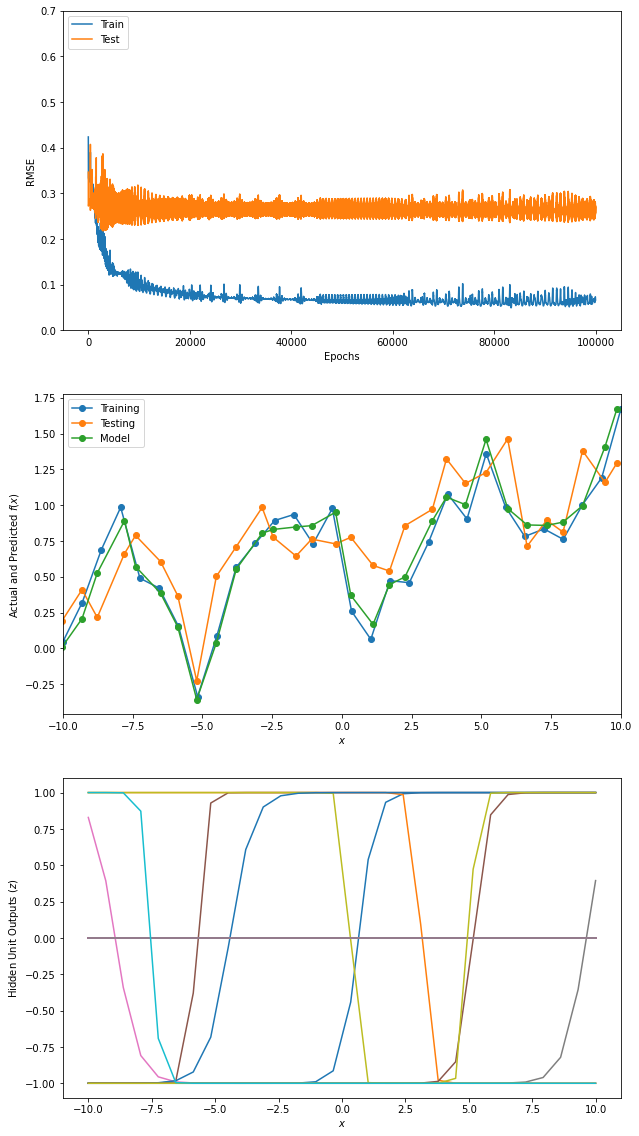

In [ ]:
# Set parameters of neural network
nHiddens = 20

rhoh = 0.1
rhoo = 0.01

#rh = rhoh / (nSamples * nOutputs)
#ro = rhoo / (nSamples * nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
#V = np.zeros((1 + Xtrain.shape[1], nHiddens))
#V = np.random.uniform(-0.0001, 0.0001, size=(1 + Xtrain.shape[1], nHiddens))
V = np.random.uniform(-0.1, 0.1, size=(1 + Xtrain.shape[1], nHiddens))
#W = np.zeros((1 + nHiddens, nOutputs))
#W = np.random.uniform(-0.0001, 0.0001, size=(1 + nHiddens, nOutputs))
W = np.random.uniform(-0.1, 0.1, size=(1 + nHiddens, nOutputs))

# Take nEpochs steepest descent steps in gradient descent search in mean-squared-error function
nEpochs = 100000
# collect training and testing errors for plotting
errorTrace = np.zeros((nEpochs, 2))

fig = plt.figure(figsize=(10, 20))
for epoch in range(nEpochs):

    # Forward pass on training data
    Z = np.tanh(XtrainS1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W

    # Error in output
    error = TtrainS - Y

    # Backward pass - the backpropagation and weight update steps
    V = V + rhoh * XtrainS1.T @ ( ( error @ W[1:, :].T) * (1 - Z**2))
    W = W + rhoo * Z1.T @ error

    YtestS = addOnes(np.tanh(XtestS1 @ V)) @ W  #!! Forward pass in one line
    Ytest = YtestS * Tstds + Tmeans

    # error traces for plotting
    error = error * Tstds  # to unstandardize otuput error
    errorTrace[epoch, 0] = np.sqrt(np.mean((error**2)))
    errorTrace[epoch, 1] = np.sqrt(np.mean((Ytest - Ttest)**2))


    if epoch % 2000 == 0 or epoch == nEpochs - 1:
        plt.clf()
        plt.subplot(3, 1, 1)
        plt.plot(errorTrace[:epoch, :])
        plt.ylim(0, 0.7)
        plt.xlabel('Epochs')
        plt.ylabel('RMSE')
        plt.legend(('Train','Test'), loc='upper left')

        plt.subplot(3, 1, 2)
        plt.plot(Xtrain, Ttrain, 'o-', Xtest, Ttest, 'o-', Xtest, Ytest, 'o-')
        plt.xlim(-10, 10)
        plt.legend(('Training', 'Testing', 'Model'), loc='upper left')
        plt.xlabel('$x$')
        plt.ylabel('Actual and Predicted $f(x)$')

        plt.subplot(3, 1, 3)
        plt.plot(Xtrain, Z)
        plt.ylim(-1.1, 1.1)
        plt.xlabel('$x$')
        plt.ylabel('Hidden Unit Outputs ($z$)');

        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)